#  __FIT1043 Intro to  Data Science__
#  __Assignment 1__
#### Naveed Hassan
#### 32799047
#### 20/03/2022
_________________________________________________________________________________________________________________________

# Introduction
This assignment will take a logical approach to analyze the given data through the use of various python libraries and built in functions within it.
The purpose of this study is to compare the Life Expectancy, Adult Mortality, Infant Deaths and GDPperCapita in South East Asian Countries


# Importing Libraries
The first step is to import libraries. In this case we use Pandas and rename it as pd to make it easier to access. This library will be used for various purposes such as using the dataFrame structure and reading data files
We will also use the matplotlib to visualize the data later on.

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

# Reading the Life Expectancy data file and Wrangling the useful data
Using the panda library, we read the csv file and store them as a data frame
We also use the head function to output the top of the dataframe to check if the file has been read correctly

In [3]:
life = pd.read_csv('data/LifeExpectancyData-v2.csv')
life.shape


(2938, 15)

In [4]:
life.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5


#### Checking the basic statistics of the values in the files.

In [5]:
life.info

<bound method DataFrame.info of           country  Year      Status  Life expectancy   infant deaths  \
0     Afghanistan  2015  Developing              65.0             62   
1     Afghanistan  2014  Developing              59.9             64   
2     Afghanistan  2013  Developing              59.9             66   
3     Afghanistan  2012  Developing              59.5             69   
4     Afghanistan  2011  Developing              59.2             71   
...           ...   ...         ...               ...            ...   
2933     Zimbabwe  2004  Developing              44.3             27   
2934     Zimbabwe  2003  Developing              44.5             26   
2935     Zimbabwe  2002  Developing              44.8             25   
2936     Zimbabwe  2001  Developing              45.3             25   
2937     Zimbabwe  2000  Developing              46.0             24   

      Adult Mortality   BMI   Alcohol consumption  Hepatitis B  Measles   \
0               263.0   19.

# Cleaning the data
Changing name 'Viet Nam' to 'Vietnam' and 'Timor-Leste' to 'East Timor'

In [6]:
life.loc[life['country'] == 'Viet Nam','country'] = 'Vietnam'
life.loc[life['country'] == 'Timor-Leste','country'] = 'East Timor'
life.loc[life['country'] == 'Lao People\'s Democratic Republic','country'] = 'Laos'



# Group the dataframe by country and status and use agg function


In [7]:
fun = {'Life expectancy ':{'max', 'mean'}, 'Adult Mortality': 'mean', ' BMI ': 'mean', 'Income composition of resources': 'mean', 'Schooling': 'mean'}
Life_Expectancy = life.groupby(['country', 'Status']).agg(fun)


# Drop the top level in column hierarchy and output final dataframe


In [8]:
#Life_Expectancy.columns = Life_Expectancy.columns.droplevel(0)
Life_Expectancy.columns = ['Mean Life Expectancy', 'Max Life Expectancy', 'Mean Adult Mortality', 'Mean BMI', 'Mean Income Composition of Resources', 'Mean Schooling']
Life_Expectancy = Life_Expectancy.reset_index()
Life_Expectancy


,country,Status,Mean Life Expectancy,Max Life Expectancy,Mean Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling
0,Afghanistan,Developing,65.0,58.19375,269.0625,15.51875,0.415375,8.21250
1,Albania,Developing,77.8,75.15625,45.0625,49.06875,0.709875,12.13750
2,Algeria,Developing,75.6,73.61875,108.1875,48.74375,0.694875,12.71250
3,Angola,Developing,56.0,49.01875,328.5625,18.01875,0.458375,8.04375
4,Antigua and Barbuda,Developing,76.4,75.05625,127.5000,38.42500,0.488625,8.84375
...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),Developing,74.1,73.38750,163.0000,54.48750,0.726812,12.78750
189,Vietnam,Developing,76.0,74.77500,126.5625,11.18750,0.627062,11.51250
190,Yemen,Developing,68.0,63.86250,211.8125,33.48750,0.475500,8.50625
191,Zambia,Developing,63.0,53.90625,354.3125,17.45000,0.498437,11.21250


# Filtering out South East Asian Countries for the Life Expectancy DataFrame
We create a tuple of South East Asian Countries as 

In [9]:
Life_Expectancy['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georg

In [10]:
SEA = ('Brunei Darussalam', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam')
Life_Expectancy_SEA = Life_Expectancy[Life_Expectancy['country'].isin(SEA)]
Life_Expectancy_SEA




,country,Status,Mean Life Expectancy,Max Life Expectancy,Mean Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling
23,Brunei Darussalam,Developing,78.3,76.48750,67.0625,29.71875,0.839375,14.10625
28,Cambodia,Developing,68.7,64.34375,196.3750,15.36250,0.491938,9.87500
51,East Timor,Developing,68.3,64.75625,170.3750,14.55000,0.517625,10.70000
78,Indonesia,Developing,69.1,67.55625,166.5625,19.95625,0.641437,11.61250
92,Laos,Developing,65.7,62.38125,197.1875,14.36250,0.515625,9.23125
102,Malaysia,Developing,75.0,73.75625,118.5625,29.16875,0.749125,12.56250
116,Myanmar,Developing,66.6,64.20000,154.3125,17.12500,0.488250,8.32500
134,Philippines,Developing,68.5,67.57500,217.9375,19.18750,0.650438,11.54375
154,Singapore,Developed,87.0,81.47500,62.0000,25.90625,0.866875,13.98125
170,Thailand,Developing,74.9,73.08125,160.3750,21.59375,0.694688,12.55000


 # Manage any data type issues or data issues

In [11]:
Life_Expectancy_SEA.dtypes

country                                  object
Status                                   object
Mean Life Expectancy                    float64
Max Life Expectancy                     float64
Mean Adult Mortality                    float64
Mean BMI                                float64
Mean Income Composition of Resources    float64
Mean Schooling                          float64
dtype: object

The data types are correct, nothing to change

# Reading the GDP data file and Wrangling the useful data
Using the panda library, we read the csv file and store them as a data frame
We also use the function to output the dataframe to check if the file has been read correctly

In [12]:
gdp = pd.read_csv('data/2019-GDP.csv')
gdp.shape

(244, 6)

In [13]:
gdp.sample(5)

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
215,SXM,NaN,NaN,Sint Maarten (Dutch part),-,NaN
216,SSD,NaN,NaN,South Sudan,-,NaN
45,CHL,42,NaN,Chile,"282,318",NaN
188,GNB,185,NaN,Guinea-Bissau,"1,340",NaN
33,NOR,30,NaN,Norway,"403,336",NaN


# Cleaning the data
Changing name 'Timor-Leste' to 'East Timor'

In [14]:
gdp['Unnamed: 3'].unique()


array([nan, 'Economy', 'United States', 'China', 'Japan', 'Germany',
       'India', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada',
       'Russian Federation', 'Korea, Rep.', 'Spain', 'Australia',
       'Mexico', 'Indonesia', 'Netherlands', 'Saudi Arabia', 'Turkey',
       'Switzerland', 'Poland', 'Thailand', 'Sweden', 'Belgium',
       'Argentina', 'Nigeria', 'Austria', 'Iran, Islamic Rep.',
       'United Arab Emirates', 'Norway', 'Israel', 'Ireland',
       'Philippines', 'Singapore', 'Hong Kong SAR, China', 'Malaysia',
       'South Africa', 'Denmark', 'Colombia', 'Egypt, Arab Rep.',
       'Bangladesh', 'Chile', 'Pakistan', 'Finland', 'Vietnam', 'Romania',
       'Czech Republic', 'Portugal', 'Iraq', 'Peru', 'Greece',
       'New Zealand', 'Qatar', 'Kazakhstan', 'Algeria', 'Hungary',
       'Ukraine', 'Kuwait', 'Morocco', 'Ecuador', 'Slovak Republic',
       'Puerto Rico', 'Cuba', 'Ethiopia', 'Kenya', 'Angola',
       'Dominican Republic', 'Sri Lanka', 'Oman', 'Guatema

In [15]:
gdp.loc[gdp['Unnamed: 3'] == 'Timor-Leste','Unnamed: 3'] = 'East Timor'
gdp.loc[gdp['Unnamed: 3'] == 'Lao PDR','Unnamed: 3'] = 'Laos'

# Filtering out South East Asian Countries for the GDP DataFrame
We create a tuple of South East Asian Countries as SEA because it is faster as compared to lists and requires less memory

In [16]:
SEA = ('Brunei Darussalam', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam')
GDP_SEA = gdp[gdp['Unnamed: 3'].isin(SEA)]
GDP_SEA_1 = GDP_SEA.drop(['Unnamed: 0','Unnamed: 2', 'Unnamed: 5', 'Gross domestic product 2019'], axis = 'columns')
GDP_SEA_Final = GDP_SEA_1.rename(columns = {'Unnamed: 3': 'country','Unnamed: 4': 'GDP (Millions US Dollars)'})
GDP_SEA_Final

,country,GDP (Millions US Dollars)
19,Indonesia,"1,119,191"
25,Thailand,"543,650"
36,Philippines,"376,796"
37,Singapore,"372,063"
39,Malaysia,"364,702"
48,Vietnam,"261,921"
74,Myanmar,"76,086"
106,Cambodia,"27,089"
120,Laos,"18,174"
136,Brunei Darussalam,"13,469"


# Reading The population.csv file
#### and checking if it is read correctly

In [18]:
population = pd.read_csv('data/2020-Population.csv')
population.shape

(305, 78)

In [19]:
population.sample(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
136,121,Estimates,Iran (Islamic Republic of),NaN,364,Country/Area,5501,17 119,17 517,17 934,...,74 635,75 540,76 482,77 466,78 492,79 564,80 674,81 800,82 914,83 993
116,101,Estimates,Oman,NaN,512,Country/Area,922,456,462,469,...,3 251,3 498,3 765,4 027,4 267,4 479,4 666,4 829,4 975,5 107
11,"© August 2019 by United Nations, made availabl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,86,Estimates,Morocco,NaN,504,Country/Area,912,8 986,9 243,9 529,...,32 782,33 242,33 716,34 192,34 664,35 126,35 581,36 029,36 472,36 911
289,274,Estimates,Western Europe,NaN,926,Subregion,917,142 414,143 163,144 007,...,188 782,189 528,190 347,191 208,192 084,192 979,193 886,194 755,195 522,196 146


# Cleaning the Population Dataframe and producing only the relevant Data

In [20]:
population = population.rename(columns = {'Unnamed: 2': 'country', 'Unnamed: 76': '2019 Population (Thousands)'})
population.loc[population['country'] == 'Viet Nam','country'] = 'Vietnam'
population.loc[population['country'] == 'Timor-Leste','country'] = 'East Timor'
population.loc[population['country'] == 'Lao People\'s Democratic Republic','country'] = 'Laos'


In [21]:
SEA = ('Brunei Darussalam', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam')
population_SEA = population[population['country'].isin(SEA)]
population_SEA_Final = population_SEA[['country', '2019 Population (Thousands)']]
population_SEA_Final

,country,2019 Population (Thousands)
152,Brunei Darussalam,433
153,Cambodia,16 487
154,Indonesia,270 626
155,Laos,7 169
156,Malaysia,31 950
157,Myanmar,54 045
158,Philippines,108 117
159,Singapore,5 804
160,Thailand,69 626
161,East Timor,1 293


# Creating a dataframe for perCapitaGDP
GDP per capita shows a country's GDP divided by its total population.


In [22]:
perCapitaGDP = pd.merge(GDP_SEA_Final, population_SEA_Final, on = 'country')
perCapitaGDP.dtypes



country                        object
GDP (Millions US Dollars)      object
2019 Population (Thousands)    object
dtype: object

# Change the data types 
We need to change data tpes of gdp and population to int so we can perform mathematical operations

In [23]:
import locale
from locale import atof

In [24]:
locale.setlocale(locale.LC_NUMERIC, '')
perCapitaGDP['GDP (Millions US Dollars)'] = perCapitaGDP['GDP (Millions US Dollars)'].map(atof)
perCapitaGDP['2019 Population (Thousands)'] = perCapitaGDP['2019 Population (Thousands)'].str.replace(" ","")
perCapitaGDP['2019 Population (Thousands)'] = perCapitaGDP['2019 Population (Thousands)'].astype(float)
perCapitaGDP.dtypes

country                         object
GDP (Millions US Dollars)      float64
2019 Population (Thousands)    float64
dtype: object

# Converting the population as a whole
Multiplying by 1000 to make it easier to understand

In [25]:
#perCapitaGDP['GDP'] = perCapitaGDP['GDP (Millions US Dollars)'].mul(1000000)
#perCapitaGDP['2019 Population'] = perCapitaGDP['2019 Population (Thousands)'].mul(1000)
perCapitaGDP = perCapitaGDP[['country', 'GDP (Millions US Dollars)', '2019 Population (Thousands)']]
perCapitaGDP

,country,GDP (Millions US Dollars),2019 Population (Thousands)
0,Indonesia,1119191.0,270626.0
1,Thailand,543650.0,69626.0
2,Philippines,376796.0,108117.0
3,Singapore,372063.0,5804.0
4,Malaysia,364702.0,31950.0
5,Vietnam,261921.0,96462.0
6,Myanmar,76086.0,54045.0
7,Cambodia,27089.0,16487.0
8,Laos,18174.0,7169.0
9,Brunei Darussalam,13469.0,433.0


# Find perCapitaGDP

In [26]:
perCapitaGDP['perCapitaGDP (Millions of USD per 1000 people)'] = perCapitaGDP['GDP (Millions US Dollars)'].div(perCapitaGDP['2019 Population (Thousands)'])
perCapitaGDP

,country,GDP (Millions US Dollars),2019 Population (Thousands),perCapitaGDP (Millions of USD per 1000 people)
0,Indonesia,1119191.0,270626.0,4.135563
1,Thailand,543650.0,69626.0,7.808146
2,Philippines,376796.0,108117.0,3.485076
3,Singapore,372063.0,5804.0,64.104583
4,Malaysia,364702.0,31950.0,11.414773
5,Vietnam,261921.0,96462.0,2.715276
6,Myanmar,76086.0,54045.0,1.407827
7,Cambodia,27089.0,16487.0,1.643052
8,Laos,18174.0,7169.0,2.535082
9,Brunei Darussalam,13469.0,433.0,31.106236


# Merging the Data
and verifying that it has been merged correctly

In [27]:
final_df = pd.merge(Life_Expectancy_SEA,perCapitaGDP, on = 'country')
final_df.shape


(11, 11)

In [28]:
final_df


,country,Status,Mean Life Expectancy,Max Life Expectancy,Mean Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling,GDP (Millions US Dollars),2019 Population (Thousands),perCapitaGDP (Millions of USD per 1000 people)
0,Brunei Darussalam,Developing,78.3,76.48750,67.0625,29.71875,0.839375,14.10625,13469.0,433.0,31.106236
1,Cambodia,Developing,68.7,64.34375,196.3750,15.36250,0.491938,9.87500,27089.0,16487.0,1.643052
2,East Timor,Developing,68.3,64.75625,170.3750,14.55000,0.517625,10.70000,1674.0,1293.0,1.294664
3,Indonesia,Developing,69.1,67.55625,166.5625,19.95625,0.641437,11.61250,1119191.0,270626.0,4.135563
4,Laos,Developing,65.7,62.38125,197.1875,14.36250,0.515625,9.23125,18174.0,7169.0,2.535082
5,Malaysia,Developing,75.0,73.75625,118.5625,29.16875,0.749125,12.56250,364702.0,31950.0,11.414773
6,Myanmar,Developing,66.6,64.20000,154.3125,17.12500,0.488250,8.32500,76086.0,54045.0,1.407827
7,Philippines,Developing,68.5,67.57500,217.9375,19.18750,0.650438,11.54375,376796.0,108117.0,3.485076
8,Singapore,Developed,87.0,81.47500,62.0000,25.90625,0.866875,13.98125,372063.0,5804.0,64.104583
9,Thailand,Developing,74.9,73.08125,160.3750,21.59375,0.694688,12.55000,543650.0,69626.0,7.808146


# Q1
#### 1. Each country will be classified as developing or developed. With this in mind, how would you visualise the expected life expectancy for the South East Asian population for developed or developing countries? Give some kind of insight (although it may be straight forward and easily understood from the visualisation).


Create a dataframe using groupby function to visualise the relevant data 

In [29]:
fun2 = {'Mean Life Expectancy':'mean'}
groupby_status = final_df.groupby('Status').agg(fun2)

Reset the index of the dataframe and output the data

In [30]:
groupby_status = groupby_status.reset_index()
groupby_status

,Status,Mean Life Expectancy
0,Developed,87.00
1,Developing,71.11


#### Visualise as a bar chart

Text(0.5, 1.0, 'Comparison of Mean Life Expectancy in Developed vs Developing countries')

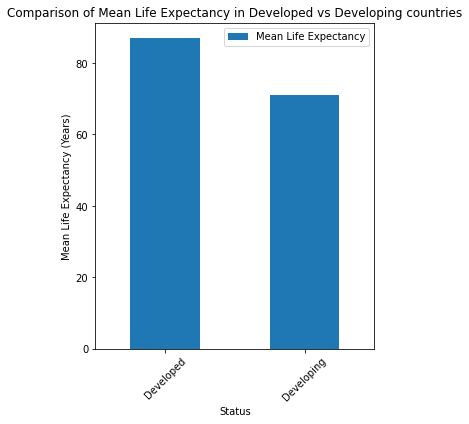

In [31]:
bar = groupby_status.plot.bar(figsize = (5,6))
# figsize sets size of plot
bar.set_xticklabels(groupby_status['Status'],rotation = 45)
# use values of column 'class' as the x axis labels.
plt.xlabel('Status')
# setting a label for x axis
plt.ylabel('Mean Life Expectancy (Years)')
# Setting a label for y axis
plt.title('Comparison of Mean Life Expectancy in Developed vs Developing countries')
# Setting the title of chart

# Answer 1
### We use a graph to visualize the data as it is between only 2 variables and one of them being a value. Hence the most suitable option being a bar chart.
### As visualised in the bar chart produced above, the average life expectancy in already developed countries is significantly larger as compared to the presently developing countries. 
### In comparison, the mean life expectancy in developed countries is approximately 87 years as seen in the bar chart whereas the mean life expectancy in developing countries is in the range of 70-72 years. This could suggest that developed countries produce a safer lifestyle, hence improving the average life expectancy as compared to developing countries

# Q2.
#### Create a bar graph for each country, with side-by-side bars for population, mean life expectancy, and adult mortality. There are two difficulties here: first, the default graph will be difficult to visualise due to big disparities in the numbers, and second, this information may not provide a decent visualisation. These two challenges need you to figure out, create the necessary code adjustments for the visualisation, and explainwhy the data used for the graph may be misleading (some general knowledge / domain expertise required).

Create a dataframe using groupby function to visualise the relevant data 

In [32]:
fun3 = {'Mean Life Expectancy':'mean', 'Mean Adult Mortality': 'mean', '2019 Population (Thousands)': 'mean'}
groupby_country = final_df.groupby('country').agg(fun3)

In [33]:
groupby_country = groupby_country.reset_index()
groupby_country

,country,Mean Life Expectancy,Mean Adult Mortality,2019 Population (Thousands)
0,Brunei Darussalam,78.3,67.0625,433.0
1,Cambodia,68.7,196.3750,16487.0
2,East Timor,68.3,170.3750,1293.0
3,Indonesia,69.1,166.5625,270626.0
4,Laos,65.7,197.1875,7169.0
5,Malaysia,75.0,118.5625,31950.0
6,Myanmar,66.6,154.3125,54045.0
7,Philippines,68.5,217.9375,108117.0
8,Singapore,87.0,62.0000,5804.0
9,Thailand,74.9,160.3750,69626.0


# Original Graph

Text(0.5, 1.0, 'Comparison of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries')

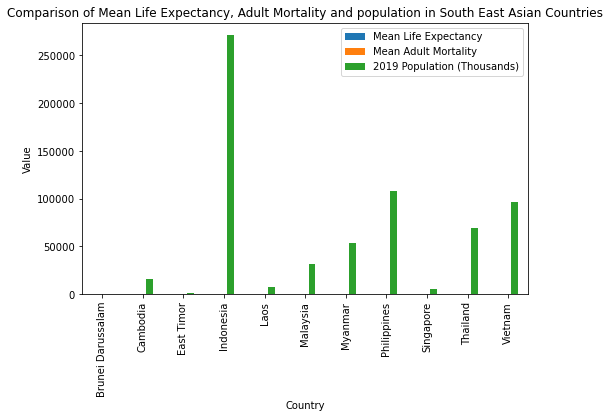

In [34]:
bar = groupby_country.plot.bar(figsize = (8,5))
# figsize sets size of plot
bar.set_xticklabels(groupby_country['country'],rotation = 90)
# use values of column 'class' as the x axis labels.
plt.xlabel('Country')
# setting a label for x axis
plt.ylabel('Value')
# Setting a label for y axis
plt.title('Comparison of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries')
# Setting the title of chart

As we can see, its difficult to visualise the relevant data, hence we improve the graph

# Improving the graph

In [35]:
groupby_country['2019 Population (Millions)'] = groupby_country['2019 Population (Thousands)'].div(1000)
groupby_country.drop('2019 Population (Thousands)', axis = 1, inplace = True)
groupby_country

,country,Mean Life Expectancy,Mean Adult Mortality,2019 Population (Millions)
0,Brunei Darussalam,78.3,67.0625,0.433
1,Cambodia,68.7,196.3750,16.487
2,East Timor,68.3,170.3750,1.293
3,Indonesia,69.1,166.5625,270.626
4,Laos,65.7,197.1875,7.169
5,Malaysia,75.0,118.5625,31.950
6,Myanmar,66.6,154.3125,54.045
7,Philippines,68.5,217.9375,108.117
8,Singapore,87.0,62.0000,5.804
9,Thailand,74.9,160.3750,69.626


Text(0.5, 1.0, 'Comparison of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries')

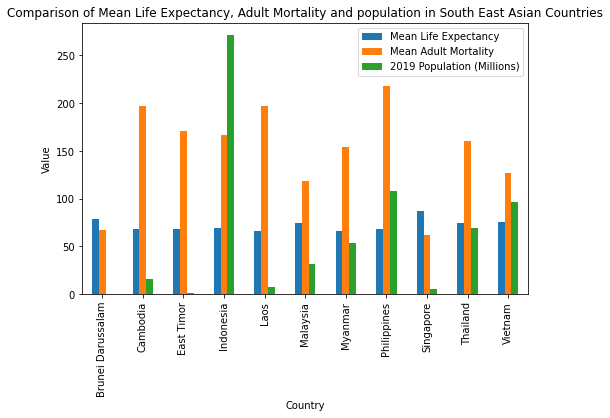

In [36]:
bar = groupby_country.plot.bar(figsize = (8,5))
# figsize sets size of plot
bar.set_xticklabels(groupby_country['country'],rotation = 90)
# use values of column 'class' as the x axis labels.
plt.xlabel('Country')
# setting a label for x axis
plt.ylabel('Value')
# Setting a label for y axis
plt.title('Comparison of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries')
# Setting the title of chart

We can convert the population into millions and display the graph, but it still doesn't clearly visualise the smaller population as there is a massive disparity between the populations of the countries (ex: Brunei, East Timor and Singapore)

# Solution 
We can create a multiline graph with different markers and adjusted marker size to make the value pop out.
This gives a more understandable visualization for the comparison  of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries

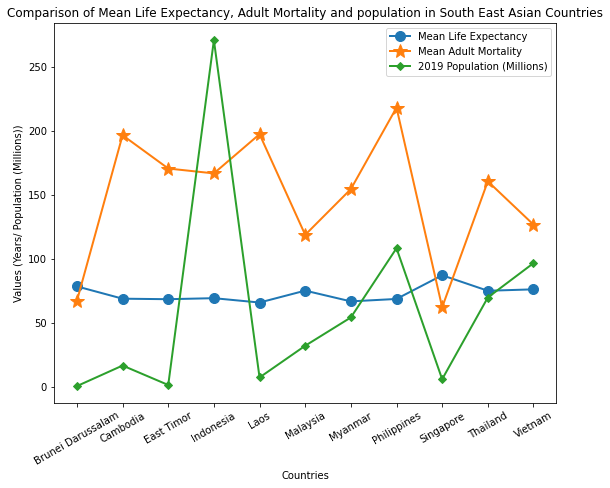

In [37]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(groupby_country['country'], groupby_country['Mean Life Expectancy'], marker='o', markersize = 10, linewidth=2, label='Mean Life Expectancy')
ax.plot(groupby_country['country'], groupby_country['Mean Adult Mortality'], marker='*', markersize = 15, linewidth=2, label='Mean Adult Mortality')
ax.plot(groupby_country['country'], groupby_country['2019 Population (Millions)'], marker='D', markersize = 5, linewidth=2, label='2019 Population (Millions)')
plt.xticks(rotation=30)
ax.set_xlabel('Countries')
ax.set_ylabel('Values (Years/ Population (Millions))')
plt.legend()
plt.title('Comparison of Mean Life Expectancy, Adult Mortality and population in South East Asian Countries')
plt.show()

# Q3.
For the final question, you will probably need the non-aggregated data from
“LifeExpectancyData-v2.csv”. You are to extract the data that’s related only to
Singapore and then plot a line graph on the Life expectancy over time. Again, plot
another line graph to visualise the Adult mortality and infant deaths over
time. Explain in what circumstances would the first line graph be useful (if at all) and
What effect will infant and adult mortality rates have on life expectancy?

The Original Life Expectancy dataframe is saved as Life_Expectancy

In [38]:
life.sample(5)


,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
752,Denmark,2000,Developed,76.9,0,12.0,52.2,11.69,NaN,14,97.0,97.0,0.1,0.860,16.5
318,Bolivia (Plurinational State of),2001,Developing,63.3,14,238.0,43.3,2.20,77.0,0,71.0,71.0,0.1,0.607,13.7
745,Denmark,2007,Developed,78.4,0,93.0,55.9,10.99,NaN,2,87.0,87.0,0.1,0.904,16.7
1313,Jamaica,2000,Developing,72.6,1,171.0,41.6,3.46,NaN,0,95.0,93.0,2.2,0.682,11.4
32,Algeria,2015,Developing,75.6,21,19.0,59.5,NaN,95.0,63,95.0,95.0,0.1,0.743,14.4


In [39]:
singapore = life.loc[life['country'] == 'Singapore']

In [40]:
singapore.reset_index()

,index,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,2313,Singapore,2015,Developed,83.1,0,55.0,33.2,1.79,96.0,0,96.0,96.0,0.1,0.924,15.4
1,2314,Singapore,2014,Developed,82.9,0,56.0,32.9,1.83,96.0,0,96.0,96.0,0.1,0.922,15.4
2,2315,Singapore,2013,Developed,82.7,0,57.0,32.7,1.83,97.0,138,97.0,97.0,0.1,0.920,15.4
3,2316,Singapore,2012,Developed,82.5,0,59.0,32.4,1.89,97.0,42,97.0,97.0,0.1,0.917,15.4
4,2317,Singapore,2011,Developed,82.2,0,6.0,32.1,1.80,96.0,148,96.0,96.0,0.1,0.911,15.2
5,2318,Singapore,2010,Developed,82.0,0,61.0,31.8,1.84,96.0,50,96.0,96.0,0.1,0.889,14.5
6,2319,Singapore,2009,Developed,81.7,0,62.0,31.5,1.73,96.0,16,97.0,97.0,0.1,0.887,14.4
7,2320,Singapore,2008,Developed,81.4,0,64.0,31.2,1.70,97.0,18,97.0,97.0,0.1,0.880,14.2
8,2321,Singapore,2007,Developed,81.1,0,65.0,3.9,1.60,96.0,15,97.0,97.0,0.1,0.873,14.1
9,2322,Singapore,2006,Developed,87.0,0,66.0,3.5,1.55,95.0,23,95.0,95.0,0.1,0.839,13.9


### Arrange the data in ascending order of year

In [41]:
singapore.sort_values('Year') 

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
2328,Singapore,2000,Developed,78.3,0,78.0,28.5,2.03,97.0,141,98.0,98.0,0.1,0.810,12.5
2327,Singapore,2001,Developed,78.7,0,76.0,28.9,2.08,95.0,408,95.0,96.0,0.1,0.820,12.7
2326,Singapore,2002,Developed,79.0,0,74.0,29.2,2.16,95.0,211,94.0,94.0,0.1,0.818,12.6
2325,Singapore,2003,Developed,79.3,0,73.0,29.6,1.43,95.0,33,96.0,96.0,0.1,0.819,12.7
2324,Singapore,2004,Developed,79.7,0,71.0,29.9,1.45,94.0,96,95.0,95.0,0.1,0.820,12.7
2323,Singapore,2005,Developed,82.0,0,69.0,3.2,1.49,96.0,33,96.0,96.0,0.1,0.821,12.6
2322,Singapore,2006,Developed,87.0,0,66.0,3.5,1.55,95.0,23,95.0,95.0,0.1,0.839,13.9
2321,Singapore,2007,Developed,81.1,0,65.0,3.9,1.60,96.0,15,97.0,97.0,0.1,0.873,14.1
2320,Singapore,2008,Developed,81.4,0,64.0,31.2,1.70,97.0,18,97.0,97.0,0.1,0.880,14.2
2319,Singapore,2009,Developed,81.7,0,62.0,31.5,1.73,96.0,16,97.0,97.0,0.1,0.887,14.4


### Group by Year for life expectancy

In [42]:
fun4 = {'Life expectancy ':'mean'}
groupby_year = singapore.groupby('Year').agg(fun4)

Arrange the dataframe

In [43]:
groupby_year = groupby_year.reset_index()
groupby_year

,Year,Life expectancy
0,2000,78.3
1,2001,78.7
2,2002,79.0
3,2003,79.3
4,2004,79.7
5,2005,82.0
6,2006,87.0
7,2007,81.1
8,2008,81.4
9,2009,81.7


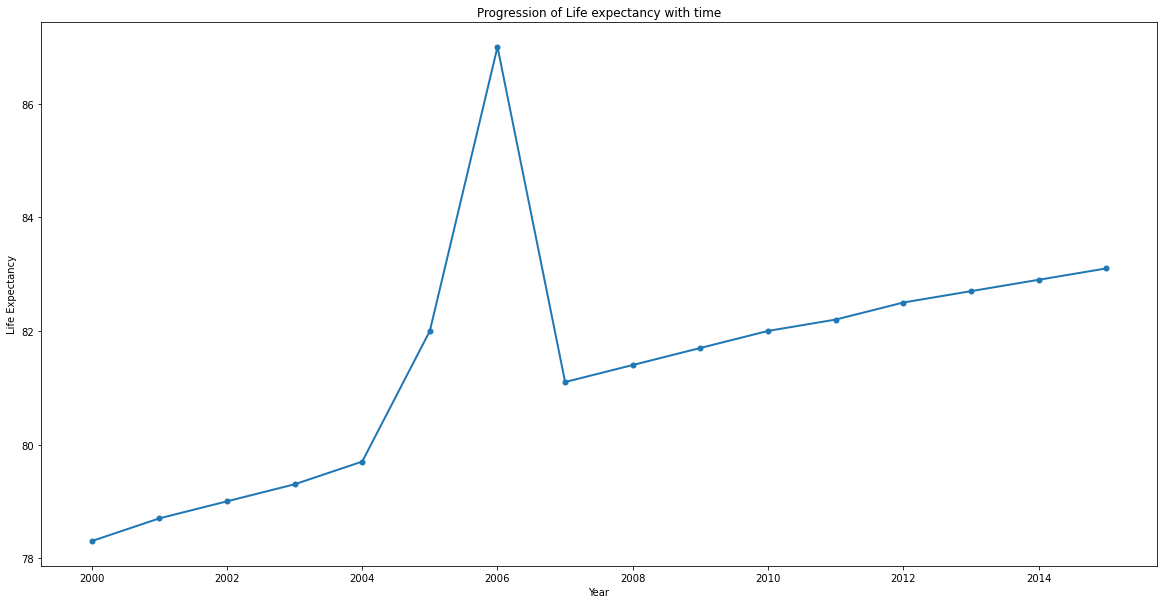

In [44]:
fig, ax = plt.subplots(figsize=[20, 10])
ax.plot(groupby_year['Year'], groupby_year['Life expectancy '], marker='o', markersize = 5, linewidth=2, label='Life Expectancy')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')
plt.title('Progression of Life expectancy with time')
plt.show()

### Removing obvious anomaly

In [45]:
filt1 = groupby_year['Life expectancy '] < 85
groupby_year = groupby_year[filt1]
groupby_year

,Year,Life expectancy
0,2000,78.3
1,2001,78.7
2,2002,79.0
3,2003,79.3
4,2004,79.7
5,2005,82.0
7,2007,81.1
8,2008,81.4
9,2009,81.7
10,2010,82.0


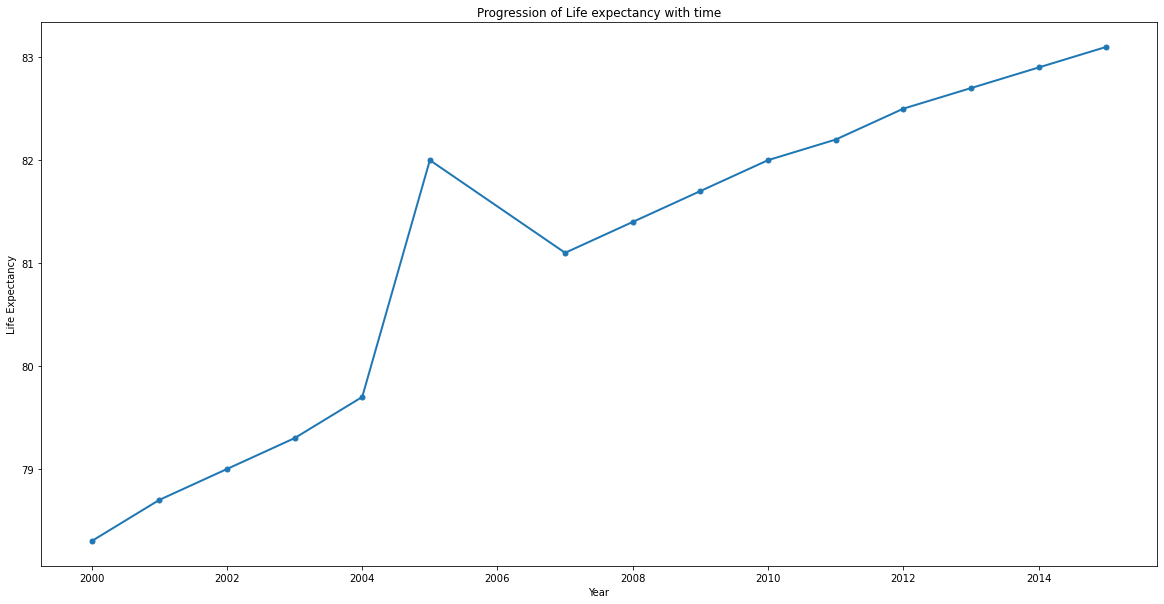

In [46]:
fig, ax = plt.subplots(figsize=[20, 10])
ax.plot(groupby_year['Year'], groupby_year['Life expectancy '], marker='o', markersize = 5, linewidth=2, label='Life Expectancy')
ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy')
plt.title('Progression of Life expectancy with time')
plt.show()

### Group by year for Adult Mortality and Infant Deaths

In [47]:
fun5 = {'Adult Mortality':'mean', 'infant deaths': 'mean'}
groupby_year2 = singapore.groupby('Year').agg(fun5)
groupby_year2 = groupby_year2.reset_index()
groupby_year2

,Year,Adult Mortality,infant deaths
0,2000,78.0,0.0
1,2001,76.0,0.0
2,2002,74.0,0.0
3,2003,73.0,0.0
4,2004,71.0,0.0
5,2005,69.0,0.0
6,2006,66.0,0.0
7,2007,65.0,0.0
8,2008,64.0,0.0
9,2009,62.0,0.0


### Removing outliers

In [48]:
filt2 = groupby_year2['Adult Mortality'] > 50.0
groupby_year2 = groupby_year2[filt2]
groupby_year2


,Year,Adult Mortality,infant deaths
0,2000,78.0,0.0
1,2001,76.0,0.0
2,2002,74.0,0.0
3,2003,73.0,0.0
4,2004,71.0,0.0
5,2005,69.0,0.0
6,2006,66.0,0.0
7,2007,65.0,0.0
8,2008,64.0,0.0
9,2009,62.0,0.0


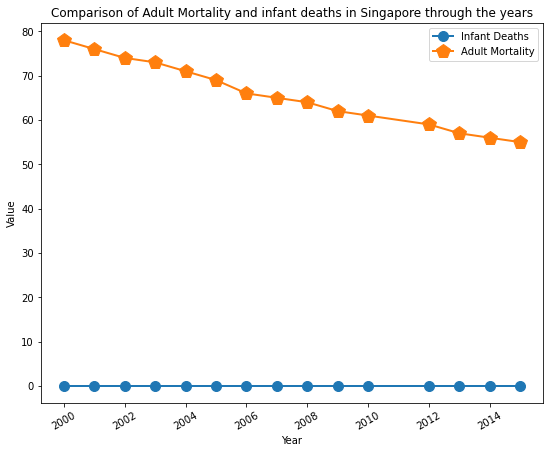

In [49]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(groupby_year2['Year'], groupby_year2['infant deaths'], marker='o', markersize = 10, linewidth=2, label='Infant Deaths')
ax.plot(groupby_year2['Year'], groupby_year2['Adult Mortality'], marker='p', markersize = 15, linewidth=2, label='Adult Mortality')
plt.xticks(rotation=30)
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.legend()
plt.title('Comparison of Adult Mortality and infant deaths in Singapore through the years')
plt.show()

# Answer 3
### The first line graph will be useful when analyzing the average life expectancy of Singapore over time, this might be able to help us figure out what factors can affect the average life expectancy in the country by comparing other data
### As we can see from the 2nd graph, the mean adult mortality gradually decreases with time, we can compare it to the 1st graph, which depicts the life expectancy increasing through the years, hence we can conclude that the decline in adult mortality results in a rise in life expectancy over the years.
### The comparison between infant deaths and life expectancy is inconclusive as there is no valuable data as the infant deaths is 0 throughout the period analyzed

# Conclusion
#### In conclusion, We used tools of python and various libraries such as pandas and matplotlib to wrangle, analyze and visualize data to compare the Populations of South East Asian Countries with the Life Expectancies and GDP for each country.
